In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
df = pd.read_csv("VectorsR&T.csv")

C:\Users\50476\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


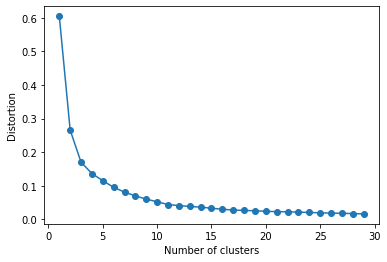

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import Imputer
df2_49 = Imputer().fit_transform(df.iloc[:,1:10])
distortions = []
for i in range(1, 30):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=50,
        tol=1e-04, random_state=0
    )
    km.fit(df2_49)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

(338, 9)


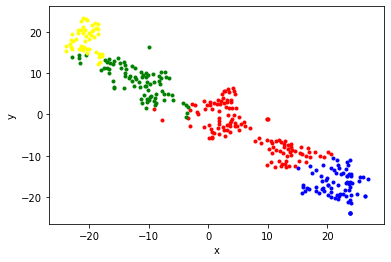

In [8]:

estimator = KMeans(n_clusters = 4)
print(df2_49.shape)
#pca = PCA(n_components = 2)
reduced_df = TSNE(n_components=2).fit_transform(df2_49)
#print(reduced_df)
#estimator.fit(df.iloc[:,1:10])
estimator.fit(df2_49)
#estimator.fit(reduced_df)
label_pred = estimator.labels_
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
yellow_x, yellow_y = [],[]
#ink_x, pink_y = [],[]
for i in range(len(reduced_df)):
    if label_pred[i] == 0 :
        red_x.append(reduced_df[i][0])
        red_y.append(reduced_df[i][1])
    elif label_pred[i] == 1:
        blue_x.append(reduced_df[i][0])
        blue_y.append(reduced_df[i][1])
    elif label_pred[i] == 2:
        yellow_x.append(reduced_df[i][0])
        yellow_y.append(reduced_df[i][1])
    else:
        green_x.append(reduced_df[i][0])
        green_y.append(reduced_df[i][1])
    '''elif label_pred[i] == 3 and reduced_df[i][0] < 0.4:
        green_x.append(reduced_df[i][0])
        green_y.append(reduced_df[i][1])
    elif label_pred[i] == 4 and reduced_df[i][0] < 0.4:
        pink_x.append(reduced_df[i][0])
        pink_y.append(reduced_df[i][1])''' 

x0 = df[label_pred == 0]
x1 = df[label_pred == 1]
x2 = df[label_pred == 2]
x3 = df[label_pred == 3]
#x4 = df[label_pred == 4]
r = x2[x2.iloc[:, 0] == 'reddit'].shape[0]
t = x2.shape[0]
#print(x2)
#print(r)
#print(t)
#print(r/t)


'''plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c="blue", marker='+', label='label2') 
plt.scatter(x3.iloc[:, 0], x3.iloc[:, 1], c="yellow", marker='o', label='label3')
plt.scatter(x4.iloc[:, 0], x4.iloc[:, 1], c="pink", marker='*', label='label4')'''
plt.scatter(red_x,red_y,c='r',marker='.')
plt.scatter(blue_x,blue_y,c='b',marker='.')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.scatter(yellow_x,yellow_y, c = 'yellow',marker='.')
#plt.scatter(pink_x,pink_y,c='pink',marker='.')
plt.xlabel('x')  
plt.ylabel('y')  
#plt.legend(loc=2)  
plt.show() 